# Simpler Breakable commitments:  Present-bias, Client Protection and Bank Ownership Forms
## Notes and code for simplified Competitive cases
**Karna Basu and Jonathan Conning**

Department of Economics
Hunter College

In [1]:
%reload_ext watermark
%watermark -u -n -t 

Last updated: Wed Apr 12 2017 14:01:29 


**Abstract:** Just like the breakable commitments paper but simplifying by just assuming that $c_0 =0$.

## The model

In [2]:
%matplotlib inline
import numpy as np
from scipy.optimize import minimize, brentq, fsolve
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams['axes.formatter.useoffset'] = 'False'
np.set_printoptions(precision=2)    # array printing format 

In [3]:
from ipywidgets import interact, fixed

In [4]:
%load_ext autoreload
%autoreload 2
#import Contract

In [5]:
Y = 300
BETA = 0.5
RHO = 1.5
KAP = 0.5

## CRRA utility function

In [6]:
def u(c, rho = RHO):
    if rho == 1:
        return np.log(c)
    else:
        return  (c**(1-rho))/(1-rho)

## Competitive subgames $\zeta(C^0,\kappa)$ 

The period 1 subgame can be competitive or monopoly.  

If we enter the **competitive subgame $\zeta(C^0,\kappa)$** One-self's **best renegotiation offer** $C_1^1(C_1^0) = (c_1^1, c_2^1)$ to the bank solves:

$$\max_{c_1^1, c_2^1} u(c_1^1)+\beta u(c_2^1) $$
s.t.
$$c_1^1 + c_2^1 +\kappa \ge c_1^0 + c_2^0 $$

A contract $C_1^0$ will be **sub-game perfect** (i.e. the consumer will choose to stick to the original $C_1^0$ rather than make this best renegotiation offer $C_1^1(C_1^0)$  as long as the contract satisfies a **no-renegotiation constraint**

$$U(C_1^0) \ge U(C_1^1(C_1^0))$$

or, same thing: $ u(c_1^0)+\beta u(c_2^0) \ge  u(c_1^1)+\beta u(c_2^1)$

## Monopoly subgames  $\zeta^m(C^{0},\kappa)$
If we enter the **monopoly subgame $\zeta^m(C^0,\kappa)$** the Bank's **best renegotiation offer** $C_1^{m1}(C_1^0) = (c_1^{m1}, c_2^{m1})$ to the One-self consumer solves:

$$\max_{c_1^{1}, c_2^{1}} \Pi(C_1^{1},C_1^0) $$
s.t. 
$$U(C_1^{m1}(C_1^0)) \ge U(C_1^0)$$


(below we will use the fact that maximizing profits $\Pi(C_1^{m1},C_1^0)$ is the same as maximizing cost savings $(c_1^0 + c_2^0) - (c_1^1 + c_2^1) $). 

A contract $C_1^0$ will be **sub-game perfect** (i.e. the consumer will choose to stick to the original $C_1^0$ rather than make this best renegotiation offer $C_1^{m1}(C_1^0)$  So long as the contract satisfies a **no-renegotiation constraint**

$$\Pi(C_1^{m1},C_1^0) \le \kappa $$

or, same thing $c_1^{1} + c_2^{1} + \kappa \ge c_1^0 + c_2^0$

Notice how in both cases then we end up with these two equations:

$$ u(c_1^0)+\beta u(c_2^0) \ge  u(c_1^1)+\beta u(c_2^1)$$
$$c_1^1 + c_2^1 + \kappa \ge c_1^0 + c_2^0$$

with at least one of the two equations as a strict equality.
(**JC note: ** the equality means just willing to accept in one case and just willing to reject in the other.)

A few things to note: 

- Any renegotiated contract would be to a point on the ray $c_2^1=\beta^\frac{1}{\rho} c_1^1$
- If the market for period zero contracts is competitive, the chosen contract will lie on the zero-profit plane running though the endowment point $y$.  Any contract along that plane satisfies  $y=y_0+y_1+y_2=c_0+c_1+c_2$.
- Projected onto $c_1 - c_2$ space this zero profit plane is a budget line with horizontal axis intercept of $y-c_0^0$ and is given by $c_1^0+c_2^0 = y - c_0^0$. 

For reference here is the diagram of the competitive full commitment contract
<img src="fig_selfcontrol.jpg" alt="Drawing" style="width: 500px;"/>

### Checking that $P$ is renegotiation-proof:

We want to find the constraints that guarantee a **renegotiation-proof contract** and then find the contract that maximizes Zero's utility and satisfies these constraints

- Contract $(c_1^0,c_2^0)$ labeled $P$ on the diagram will be renegotiation proof if the following two conditions hold (with at least one holding as a strict equality, depending on whether period 1 is competitive or monopoly):

- **Bank no-renegotiation constraint** (the gains to the bank fall short of renegotiation cost):

$$c_1^0+c_2^0 \le c_1^1 + c_2^1 + \kappa$$

-  **One-self no-renegotiation constraint** :

$$ u(c_1^0)+\beta u(c_2^0) \ge u(c_1^1)+\beta u(c_2^1)  $$

Since any renegotiated contract satisfies $c_2^1 = \beta^\frac{1}{\rho}c_1^1$ we can rewrite the above conditions as:

$$c_1^0+c_2^0 \le (1+\beta^\frac{1}{\rho})\cdot c_1^1 + \kappa$$

and 

$$ (1+\beta^\frac{1}{\rho})\cdot u(c_1^1)\le u(c_1^0)+\beta u(c_2^0)  $$

#### Competitive case:
If period 0 is competitive the contract will be on the zero profit plane, so in $c1-c2$ space on the budget line:

$$c_1^0 + c_2^0  = y - c_0^0$$

This means the **bank no-renegotiation** condition can be rewritten:

$$c_1^1 \ge \frac{y-c_0^0-\kappa}{(1+\beta^\frac{1}{\rho})}$$

This gives us the $c_1^1$ coordinate of **R** in the diagram. 

Renegotiation proof continuation contract $P$ (point $(c_1^0, c_2^0)$) is given by the point where the One-self indifference curve passing through $R$ hits the period 1 budget constraint $(c_1^0 + c_2^0 = y-c_0^0)$

$$u(c_1^0)+\beta u(c_2^0) = u(c_1^1)+\beta u(c_2^1)  $$

substituting for the $R$ contract (and using the fact that $c_2^0 = y-c_0^0-c_1^0$ under competition)

$$ 
u(c_1^0)+\beta u((y-c_0^0) - c_1^0) = (1+\beta^\frac{1}{\rho}) u \left(\frac{y-c_0^0 - \kappa}{1+\beta^\frac{1}{\rho}}\right) 
$$

Since $c_0^0$ and $\kappa$ are fixed this is an equation in $c_1^0$.  This will have two roots (we want the one that corresponds to point P). We can graph and solve for roots numerically. We do that below, but first some comparative statics.

Total differentiation gives:

$$\left[ u'(c_1^0) - \beta u'(y-c_0^0-c_1^0) \right ] dc_1^0 = -(1+\beta^\frac{1}{\rho}) u' \left(\frac{y-\kappa}{1+\beta^\frac{1}{\rho}}\right) $$

$$\frac{dc_1^0}{dk} = 
\frac{ -(1+\beta^\frac{1}{\rho}) u' \left(\frac{y-c_0^0 - \kappa}{1+\beta^\frac{1}{\rho}}\right)}
     {\left [ u'(c_1^0) - \beta u'(y-c_0^0-c_1^0) \right ]} \leq 0$$

We can sign the above because the numerator is always negative and the denominator is non-negative at point P because it lies on the budget line to the left of point Q (and hence $u'(c_1) > \beta u'(c_2)$ and only at Q do we have $u'(c_1) = \beta u'(c_2)$.


Let's plot the two parts of this last function

## Notes on $ \bar \kappa$, subgames and solving

In [7]:
Y = 300 
def kbar(beta, rho):
    if (rho == 1):
        rho = 0.999   # cheap trick to deal with special case
    btr = beta**(1/rho)
    c1F = Y * btr/(1+2*btr)
    A = (2-(1+btr)*( (1+beta)/(1+btr)  )**(1/(1-rho)))
    return A*c1F


In [8]:
kbar(0.5,0.95)

8.497089119683764

In [9]:
CF = Y/(1+2*BETA**(1/RHO))
CF

132.7480002073326

In [10]:
1/(1+BETA**(1/RHO))

0.6135117904356906

In [11]:
c= np.linspace(0,Y-1)

def rp(c0, kap, beta=BETA, rho=RHO):
    '''return period 1 consumption of reneg-proof contract.
    If kappa>kbar then full commitment sustained'''
    c1F = (Y-c0)/2   
    if kap >= kbar(beta,rho):
        return c1F
    btr = beta**(1/rho)
    c1P = (Y-c0-kap)/(1+btr)
    c1P0 = (Y-c0)/(1+btr)
    ub = (1+btr)*u(c1P, rho)
    def U1(c1):
        return u(c1, rho) + beta*u(Y-c0-c1, rho)
    def f(c1):
        return U1(c1) - ub
    #print(f(c1F),f(c1P))
    return brentq(f, c1F,c1P)      

In [12]:
rp(163,0, beta= 0.5,rho=0.5)

109.6

In [13]:
 def rp_plot(c0, kap, beta=BETA, rho=RHO):
    btr = beta**(1/rho)
    c1F = (Y-c0)/2   
    c1R = (Y-c0-kap)/(1+btr)
    c1P0 = (Y-c0)/(1+btr)
    ub = (1+btr)*u(c1R, rho)
    def U1(c1):
        return u(c1, rho) + beta*u(Y-c0-c1, rho)
    if (kap<kbar(beta,rho)):
        c1Pk =rp(c0, kap, beta, rho)
    else:
        c1Pk = c1F
    print('FC = {:5.2f} RP = {:5.2f}  c1R = {:5.2f} RP(0) = {:5.2f}'.format(c1F,c1Pk, c1R, c1P0))
    plt.plot(c, u(c, rho) + beta*u(Y-c0-c, rho))
    plt.axhline(y=ub, color='r')
    for var in ['c1Pk', 'c1F', 'c1P0', 'c1R']:  # way to loop through variables and their names
        plt.axvline(x=eval(var), linestyle ='dashed') 
        plt.text(eval(var), U1(c1F), var)
    
    plt.xlim(c1F-10,Y-c0)
    plt.ylim(U1(c1F),U1(c1P0))
    plt.title('subgame ('+ r'$c_0^F, \kappa; \beta, \rho $)'+' = ({:4.1f}, {:4.1f}; {:2.1f}, {:2.1f})'
              .format(c0,kap, beta, rho))
    plt.show()

In [14]:
bt, rh = 0.5, 0.8
btr=bt**(1/rh)
C0F = Y/(1+2*btr)
kbar(bt, rh), rp(C0F,10.0, bt, rh), C0F

(9.227605315551397, 68.51795747055826, 162.96408505888348)

In [15]:
u(100, rho=0.5)

20.0

FC = 68.52 RP = 79.13  c1R = 103.23 RP(0) = 109.63


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


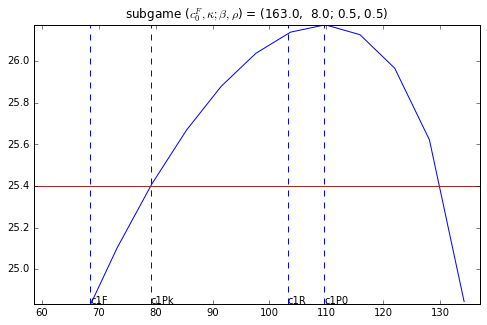

In [16]:
rp_plot(C0F, 8, rho=0.5)

FC = 83.63 RP = 96.08  c1R = 125.80 RP(0) = 133.80


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


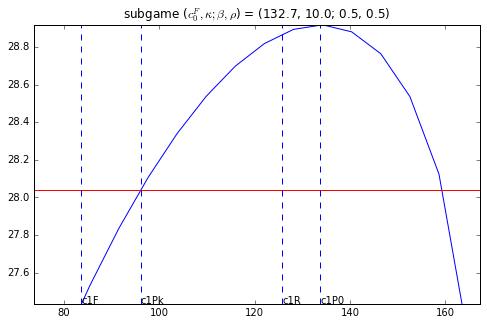

In [17]:
#rp_plot(0, rho=0.5)
rp_plot(CF,10, rho=0.5)

The plot below shows the relevant root (solution for $c_1^0$), or where the left hand side of the expression below equals the right hand side:

$$ u(c_1^0)+\beta u(y-c_1^0) = (1+\beta^\frac{1}{\rho}) u \left(\frac{y-\kappa}{1+\beta^\frac{1}{\rho}}\right) $$

Obviously the solution lies between $c_1^F$ and $c_1^P$, where this last is the renegotiation proof contract when $\kappa=0$

In [18]:
beta = 0.5
rho = 0.8
CF = Y/(
    1+2*beta**(1/rho))
rp(CF,1)

77.36933801264101

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in power
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in power


FC = 68.57 RP = 68.57  c1R = 79.53 RP(0) = 84.13


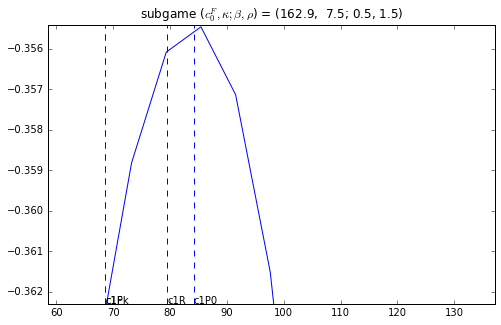

<function __main__.rp_plot>

In [19]:
interact(rp_plot, kap=(0.1,15,0.1), beta=fixed(0.5), rho=(0.2,3,0.1),c0=(CF-5,CF+5,0.1))

In [20]:
def foo_plot(kap, beta, rho):
    btr = beta**(1/rho)
    yb = (Y-kap)/(1+btr)
    ub = (1+btr)*u(yb, rho)
    c1F = Y/2             #full-commitment contract
    c1P0 = Y/(1+btr)
 
    plt.plot(c, u(c, rho) + beta*u(Y-c, rho))
    plt.axhline(y=ub, color='r')
    plt.xlim(c1F-10,Y-50)
    plt.ylim(-0.4,1)
    plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in power


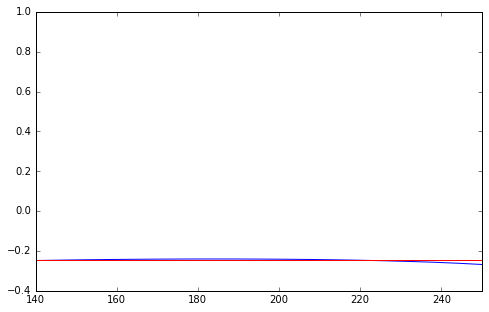

<function __main__.foo_plot>

In [21]:
interact(foo_plot, kap=(0.1,15,0.1), beta=(0.1,1,0.1), rho=(0.2,3,0.1))

## Monopoly case


#### Monopoly Full commitment contract

The full commitment monopoly contract is given by the tangency point along Zero's participation constraint 

$$u(c_1^0)+u(c_2^0) = \bar u$$ 

  Solving where where $c_1 = c_2 = c^{mF}$. Solving


$$u(c^{mF}) = \frac{\bar u}{2} $$

$$ c^{mF} = \left ( \frac{\bar u \cdot (1-\rho)}{2} \right ) ^\frac{1}{1-\rho}$$

#### Monopoly Renegotiation Proof when $\kappa=0$

Let's call this point $Q$. It is found where Zero's participation constraint meets the $c_2 = \beta^\frac{1}{\rho} c_1$ line:

$$u(c_1^0)+u(\beta^\frac{1}{\rho} c_1) = \bar u$$ 

Solving 

$$ u(c_1^Q) = \frac{\bar u}{\left ( 1+\beta^\frac{1-\rho}{\rho} \right )}$$







#### Monopoly Renegotiation Proof when $\kappa>0$

The monopolist in effect chooses a contract $(c_1^0, c_2^0)$ along the Zero consumer's participation constraint 

$$u(c_1^0)+u(c_2^0) = \bar u$$ 

If in period 1 the consumer and monopolist renegotiated it would be to to $(c_1, c_2))$ that satisfies:

$$u(c_1) + \beta  u(c_2) = u(c_1^0) + \beta  u(c_2^0) $$

Call $\Pi$ the level of profit at $P$

We will have

$$c_1^0 + c_2^0 = y - \Pi $$

The no-reneg constraint:

$$c_1^0 + c_2^0 - c_1 - c_2 \leq \kappa$$

Which means that at $R$ when the constraint binds we have profits being just short of $\Pi + \kappa$ and hence:

$$c_1 + c_2 = y - \Pi - \kappa$$

and $R$ is given by the intersection of the $c_2 = \beta^\frac{1}{\rho} c_1$ line and this line, which gives us:

$$c_1 = \frac{y - \Pi - \kappa}{1+\beta^\frac{1}{\rho}}$$

So we have:

$$u(c_1^0) + \beta u(y-\Pi-c_1^0) = (1+\beta^\frac{1}{\rho}) \cdot
u\left ( \frac{y - \Pi - \kappa}{1+\beta^\frac{1}{\rho}} \right )   $$

This is the same expression as we had above for the competitive case except for the profit shifter $\Pi$

In [22]:
def c_hi(beta, rho):
    return 1/(1+beta**(1-rho)/rho)

In [23]:
interact(c_hi, beta=(0.1,1,0.1), rho=(0.1,4,0.1))

0.5

<function __main__.c_hi>

 
That means we can write

$$u(c_1^0) = \bar u - u(c_2^0)$$

which also implies that the period 1 consumer partipation constraint (that they earn at least as much from renegotiation) can be written:

$$u(c_1) + \beta u(c_2) = u(c_1^0) + \beta u(c_2^0) $$

$$ u(c_1) + \beta u(c_2)  = u(c_1^0) \cdot (1-\beta) + \beta \bar u $$



The last substitution comes from the fact that any renegotiated contract will satisfy FOC which imply 
$c_2 = \beta^\frac{1}{\rho} c_1$.

This then implies that we can write

$$ u(c_1)  = \frac{u(c_1^0) \cdot (1-\beta) + \beta \bar u}{1+ \beta^\frac{1}{\rho} } $$

### IGNORE EVERYTHING BELOW...


The Contract module takes advantage of python's object oriented design. Let's demonstrate simple use. The following call establishes 'c' as an instance of the Contract object defined by the Contract class in the Contract.py module. In this example we initialize $\beta$ explicitly (which can then be viewed modified via c.beta). Other attributes (as the value of the income stream y are initialized to default values when c is setup since no value was specified). 

We then call on the print_params method to print out a summary of properties (parameters) of this specific contract c.

In [31]:
import Contract

In [33]:
c = Contract.Contract(beta = 0.5)
c.print_params()

beta    : 0.5
rho     : 0.95
y       : [100 100 100]


Let's plot an indifference curve in c1-c2 space.  For example if the agent in autarky has income $\{y_{0},y_{1},y_{2}\}$ and no access to saving or borrowing then (from period 0 self's perspective) entering period 1 they have reservation utility $u(y_{1})+\delta u(y_{2})=\overline{u}_{0}$.  But when period 1 rolls around their preferences change. From period 1 self's perspective they have reservation utility $u(y_{1})+\beta \delta u(y_{2})=\overline{u}_{1}$.  

### Exclusive competitive contracts

The contract class defines a generic contract which holds consumption stream objects of the form $\left( c_{0},c_{1},c_{2}\right)$ and allows a few manipulations.  Now comes the job of solving for optimal contracts and we do this with a CompetitiveContract class which inherits the attributes and methods of the more generic contract class and then adds a few methods such as calculating the optimal contract full commitment and renegotiation-proof contracts in the competitive lender case.  Note that the methods have the same names as the mon_contract class but some behave differently, reflecting the reversed objective and constraint.


#### Full-commitment contracts

When the competitive lender can commit to not-renegotiating the contract (i.e. to not pandering to the period-1 self's desire to renegotiate period-0's contract) and the contracts are exclusive (so no third party lender will enter to offer such renegotiation either) the contract solves

$$\max \  u\left( c_{0}\right) +\beta \left[ \delta u\left( c_{1}\right) +\delta ^{2}u\left( c_{2}\right) \right] $$

subject to the zero profit constraint
$$s.t.  (y_{0}-c_{0})+\frac{(y_{1}-c_{1})}{(1+r)}+\frac{(y_{2}-c_{2})}{(1+r)^{2}}  \geq 0$$


When $\delta =\frac{1}{(1+r)}$ for the CRRA case an optimum will set $c_{1}=c_{2}=\overline{c}$ and $\overline{c}=\beta ^{\frac{1}{\rho }}c_{0}$ from which a closed form solution can be easily found (see fcommit() function below for formulas).

**Note** that we are here assuming that the consumer has no choice but to consume their income stream $y$ under autarky.  This would be true if the agent does not have acess to any 'own savings' technologies.  Later below we see how things change only slightly when we allow them to use own savings to create a slightly more smooth autarky consumption stream (not perfectly smooth because they cannot overcome their self-control problems on their own).

#### Renegotiaton-proof contracts

***[this doesn't exactly follow the paper ]***
The agent's period-1-self's preferences differ from those of his period 0 self so they will often want to renegotiate any contract their period 0 self contracted, and the bank can profit from this renegotiation so long as its renegotiaton cost $\kappa $ is low.   In particular if the period-0-self agreed to contract $\left( \bar{c}_{0},\bar{c}_{1},\bar{c}_{2}\right) $ a competitive firm would offer to renegotiate the remaining $(\bar{c}_{1},\bar{c}_{2})$ to contract $\left( c_{1}^{r},c_{2}^{r}\right) $ chosen to maximize

$$\max \ \ u(c_{1})+\beta (\delta u(c_{1}) +\delta^{2} u(c_{2})) $$
subject to $$(y_{1}-c_{1})+\frac{(y_{2}-c_{2})}{(1+r)} \geq 0$$


We can show from the agent's first order conditions for the CRRA case that a renegotiated contract will always satisfy $c_{2}=\beta ^{\frac{1}{\rho }}c_{1}$ and indeed for CRRA we get the closed form:
$$ \hat{c}_{0} =\frac{\sum y_{i}}{1+2\beta^{1/\rho}}$$

and $c_{2}^{r}(\bar{c}_{1},\bar{c}_{2})=\beta ^{\frac{1}{\rho }}c_{1}^{r}(\bar{c}_{1},\bar{c}_{2})$.  See the reneg(c) function.

A sophisticated present-biased consumer anticipates that this type of renegotiation may happen and will only agree to renegotiation-proof contracts that do not renegotiate to favor their period 1 selves.  The profit-maximizing renegotiation-proof contract solves


$$\max_{c_{0},c_{1},c_{2}}\Pi \left( c_{0},c_{1},c_{2}\right) $$
$$U(c_{0},c_{1},c_{2})\geq U_{0}(y_{0},y_{1},y_{2})$$
$$\Pi \left( c_{1}^{r},c_{2}^{r}\right) -\Pi \left( c_{1},c_{2}\right) \leq \overline{\kappa }$$
The first constraint is the period 0 self's participation constraint and the second is the no-renegotiation proof constraint that the bank not find it profitable to offer to renegotiate to the contract that period-1 self will demand.

Let's create an instance of a Competitive contract which we will call cC, and then run a few checks to make sure the cM.reneg function works right:

In [34]:
cC = Contract.Competitive(beta = 0.5)
cC.rho = 1
cC.y = [200,50,50]
cC.print_params()

beta    : 0.5
guess   : [100 100 100]
kappa   : 0
rho     : 1
y       : [200, 50, 50]


### Full commitment contract: closed form solution
#### Case 1: where potential renegotiation surplus goes to consumer

In [35]:
cCF=cC.fcommit()
cCF 

array([ 150.,   75.,   75.])

Analytically calculated renegotiation proof when kappa=0

In [36]:
cCRPa = cC.ownsmooth()
cCRPa

array([ 150.,  100.,   50.])

In [37]:
# The renegotiated contract (from full commitment)
cCF=cC.fcommit()
cC.kappa = 0
cC.guess = cCRPa
cCR = cC.renegC(cCF)
cCR

array([ 150.,  100.,   50.])

### The renegotiation proof contract

Note this is calculated via numeric optimization when using the reneg_proof method so there may be slight (rounding).

In [38]:
cCRP = cC.reneg_proof(monop_reg = False).x
cCRP

array([ 149.85,  100.1 ,   50.05])

For the $\kappa = 0$ case we can solve this via closed form to get essentially the same answer:

In [39]:
cC.ownsmooth()

array([ 150.,  100.,   50.])

In [40]:
# compare three contracts 
# (note python trick to convert string label into var name)
print('kappa = ',cC.kappa)
print('y =',cC.y)
print("consumption and net saving in each period")
for con in ['cCF ', 'cCR ', 'cCRP','cCRPa']:
    C = eval(con)
    y = cC.y
    print(con + "       : {}  sum   : {:4.0f}"
          .format(C, C.sum()))
    print(con + "(net s): {}     profit: {:4.2f}"
          .format(y - C, cC.profit(C,cC.y)))
   
    print("PVU(0): {:4.3f} {}  b*[]: {:4.3f}"
          .format(cC.PVU(C,cC.beta),cC.u(C),
                cC.beta*cC.u(C)[1:].sum() ))
    print("PVU(1): {:4.4f}"
          .format(cC.PVU(C[1:],cC.beta)))
    print()

kappa =  0
y = [200, 50, 50]
consumption and net saving in each period
cCF        : [ 150.   75.   75.]  sum   :  300
cCF (net s): [ 50. -25. -25.]     profit: 0.00
PVU(0): 9.328 [ 5.01  4.32  4.32]  b*[]: 4.317
PVU(1): 6.4762

cCR        : [ 150.  100.   50.]  sum   :  300
cCR (net s): [ 50. -50.   0.]     profit: 0.00
PVU(0): 9.269 [ 5.01  4.61  3.91]  b*[]: 4.259
PVU(1): 6.5612

cCRP       : [ 149.85  100.1    50.05]  sum   :  300
cCRP(net s): [  5.01e+01  -5.01e+01  -4.93e-02]     profit: -0.00
PVU(0): 9.269 [ 5.01  4.61  3.91]  b*[]: 4.260
PVU(1): 6.5627

cCRPa       : [ 150.  100.   50.]  sum   :  300
cCRPa(net s): [ 50. -50.   0.]     profit: 0.00
PVU(0): 9.269 [ 5.01  4.61  3.91]  b*[]: 4.259
PVU(1): 6.5612



The bank does not profit from this type of opportunistic renegotiation, if we assume 'competition' at time of renegotiation **although one might argue** that the relation is ex-ante competitive but ex-post favors the bank.

A sophisticated consumer will however anticipate this type of opporunistic renegotiation and only agree to a renegotiation-proof contract.  

As expected the bank's profits are lowered due to its inability to commit to not renegotiate.

Here's a plot.

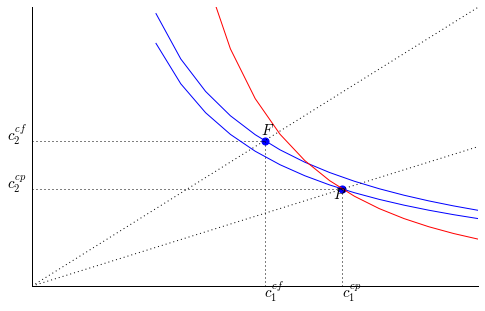

In [41]:
c1min, c1max = np.min(cCR)*0.6, np.max(cC.y)
c1min = 0
c1max = 160
c1 = np.arange(0,c1max,c1max/20)
c1_ = np.arange(40,c1max,c1max/20)
y = cC.y
#cCRP = cCRPa
#indifference curves functions
ubar0 = cC.PVU(cCF[1:3], 1.0)
idc0 = cC.indif(ubar0, 1.0)
ubar1 = cC.PVU(cCF[1:3],cC.beta)
idc1 = cC.indif(ubar1,cC.beta)
ubar0RP = cC.PVU(cCRP[1:3], 1.0)
idc0RP = cC.indif(ubar0RP,1.0)
ubar1RP = cC.PVU(cCRP[1:3], cC.beta)
idc1RP = cC.indif(ubar1RP,cC.beta)


fig, ax = plt.subplots()
# trick to display contract points and coordinate lines http://bit.ly/1CaTMDX
xx = [cCF[1], cCRP[1]]
yy = [cCF[2], cCRP[2]]
plt.scatter(xx,yy, s=50, marker='o',color='b')
[plt.plot([dot_x, dot_x] ,[0, dot_y],':',linewidth = 1,color='black' ) for dot_x, dot_y in zip(xx,yy) ] 
[plt.plot([0, dot_x] ,[dot_y, dot_y],':',linewidth = 1,color='black' ) for dot_x, dot_y in zip(xx,yy) ]

# indifference curves
plt.plot(c1_,idc0(c1_),color='blue')          
#plt.plot(c1_,idc1(c1_),color='red') 
plt.plot(c1_,idc0RP(c1_),color='blue')
plt.plot(c1_,idc1RP(c1_),color='red')
# rays
plt.plot(c1, c1,':',color='black')
plt.plot(c1, cC.beta**(1/cC.rho)*c1,':',color='black')
# isoprofit line(s)
#isoprofline = cC.isoprofit(cC.profit(cMF,cC.y)-(y[0]-cCF[0]), y)
#plt.plot(c1,  isoprofline(c1),':' )

ax.spines['right'].set_color('none'), ax.spines['top'].set_color('none')
plt.ylim((c1min, c1max*0.9)), plt.xlim((c1min, c1max*0.9))
ax.xaxis.tick_bottom(),ax.yaxis.tick_left()
plt.xlabel('$c_{1}$'); plt.ylabel('$c_{2}$')

# label the points
ax.text(cCF[1]-1, cCF[2]+3, r'$F$', fontsize=15)
ax.text(cCRP[1]-3, cCRP[2]-5, r'$P$', fontsize=15)
ax.text(cCRP[1], -6, r'$c^{cp}_{1}$', fontsize=15)
ax.text(-8, cCRP[2], r'$c^{cp}_{2}$', fontsize=15)
ax.text(cCF[1], -6, r'$c^{cf}_{1}$', fontsize=15)
ax.text(-8, cCF[2], r'$c^{cf}_{2}$', fontsize=15)

#ax.text(0, -10, r'Competitive $\kappa = {}$'
#        .format(cC.kappa), fontsize=12)
#ax.text(0, -15, r'$\beta = {}, \  \rho = {}$'
#        .format(cC.beta, cC.rho), fontsize=12)

# isoprofit lines could be plotted like so
#isop  = cC.isoprofit( cC.kappa, cCRP)   # returns a function of c1 
#plt.plot(c1_, isop(c1_),':')
#turn off the axis numbers
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.savefig('figs\CompetitiveFig.pdf', format='pdf')
plt.show()

In [42]:
# isoprofit lines could be plotted like so
# isop  = cM.isoprofit( 0.0, cM.y)   # returns a function of c1 
# plt.plot(c1, isop(c1))

## The role of $\rho$ in RP contracts

In the section of the paper called 'The Renegotiation Problem' on or aroudn page 18 we show that 

>for all  $0<\beta<1$ we will have $c_0^P\gtreqless c_0^F$ as $\rho \lesseqgtr 1$  and $c_2^P<c_2^F$.  That means that when $\rho<1$
 and the elasticity of intertemporal substitution $\frac{1}{\rho}$ is high Zero  will respond to the failure of commitment by allocating less resources to period 1 and 2 consumption -- saving less or borrowing more in period 0. When  $\rho>1$ she responds by allocating more resources -- saving more or borrowing less in period 0 
... In fact period 0 consumption adjustments are  small relative to the increase in period 1 consumption.  In other words even though they have a first-mover advantage, Zero can do little other than to  largely accommodate to the  consumption pattern that One self wants to impose. There is little Zero can do to ameliorate the self-control problem on their own -- hence her demand for commitment services from the bank. 

Here we show that last numerical claim by plotting $\frac{c2_P}{c2_F}$ at different levels of $\beta$ and $\rho$

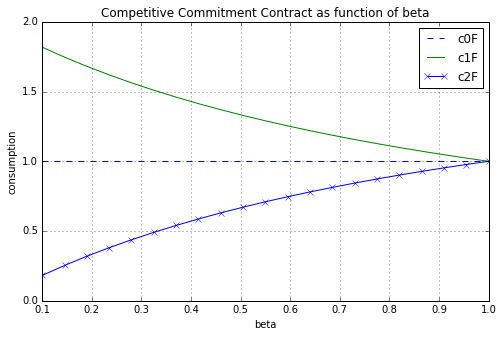

In [43]:
cCE = Contract.Competitive(beta = 0.5)          # create an instance m
cCE.rho = 1

num_pts = 21
betas = np.linspace(0.1,1,num_pts)           # iterate over different values of beta
CCF = np.zeros((3,num_pts))                  # 3 row matrix to store (c0,c1,c2) for each beta
CCR = np.zeros((3,num_pts))                  # to store renegotiation proof     

for i in range(0,num_pts):
    cCE.beta = betas[i]                    # change beta before recalculating optimal contract
    CCF[:,i] = cCE.fcommit()   
    CCR[:,i] = cCE.ownsmooth()   

r0 = CCR[0,:]/CCF[0,:]               # save results for plotting
r1 = CCR[1,:]/CCF[1,:]
r2 = CCR[2,:]/CCF[2,:]

plt.plot(betas,r0,'--')                          # plot    
plt.plot(betas,r1)
plt.plot(betas,r2,'b-x')
plt.grid()
plt.title('Competitive Commitment Contract as function of beta')
plt.xlabel('beta')
plt.ylabel('consumption')
plt.legend(['c0F','c1F','c2F'])
plt.show()


Here is a plot to see how much period 0 consumption changes in the absence of commitment relative to commitment.  
As before period 0 consumption increases for all $\rho$<1 and increases for all above 1.  

The figure that follows is busy looking because we plot for different levels of $\beta$ and $\rho$.  The important takeaway is just that period zero consumption does **not** move very much (like maybe 6% at extreme values).  However period 1 and period 2 consumption can move a lot.

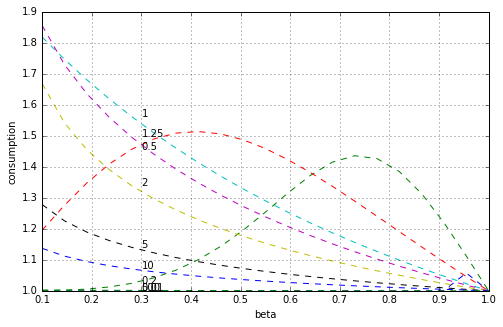

In [44]:
CCP = np.zeros((3,num_pts)) 
for rh in [0.01, 0.2, 0.5, 1, 1.25, 2, 5, 10, 500]:
    cCE.rho = rh
    for i in range(0,num_pts):
        cCE.beta = betas[i]                    # change beta before recalculating optimal contract
        CCF[:,i] = cCE.fcommit()   
        CCP[:,i] = cCE.ownsmooth()   

    r0 = CCP[0,:]/CCF[0,:]               # save results for plotting
    r1 = CCP[1,:]/CCF[1,:]
    r2 = CCP[2,:]/CCF[2,:]

    plt.plot(betas,r1,'--')                          # plot 
    plt.text(0.3, r1[4],rh)
plt.xlabel('beta')
plt.ylabel('consumption')
plt.grid()
plt.show()

In [45]:
cCE.rho, cCE.beta = 0.5, 0.5
CCP = cCE.ownsmooth()
CCF = cCE.fcommit()
np.multiply(CCP, 1/CCF)


array([ 1.03,  1.49,  0.37])

## Optimal contract when renegotiation cost $\kappa $ >0

Plot to explore how the renegotiation cost $\kappa $ affects the terms of the contract and firm profits

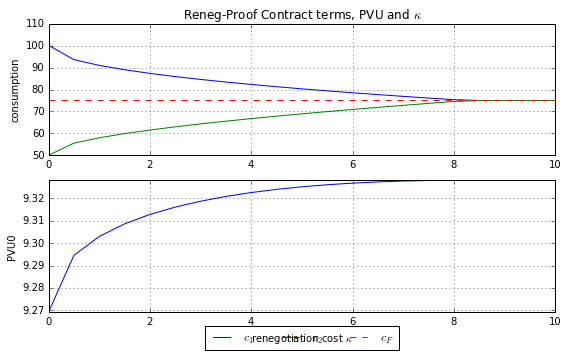

In [46]:
# Note:  re-run all cells above if the plot seems wrong
cC.y = np.array([100,100,100]) 
cCF = cC.fcommit()
num_pts = 21
kaps = np.linspace(0, 10, num_pts)      # different renegotiation cost values 
cCRP, pvu0RP = np.zeros((3,num_pts)), np.zeros(num_pts)  # init (c0,c1,c2) and profits at each kappa

for i in range(0,num_pts):               # look through kappa recalculating optimal contract each time
    cC.kappa = kaps[i] 
    cCRP[:,i] = cC.reneg_proof().x 
    pvu0RP[i] = cC.PVU(cCRP[:,i],cC.beta)

c0,c1,c2 = cCRP[0,:], cCRP[1,:],cCRP[2,:]                # save results for plotting

fig, (ax0, ax1) = plt.subplots(nrows = 2)
#ax0.plot(kaps, c0, label='$c_{0}$')
ax0.plot(kaps, c1, label='$c_{1}$')
ax0.plot(kaps, c2, label='$c_{2}$')
ax0.plot(kaps, np.ones(num_pts)*cCF[1], '--', label='$c_{F}$')
ax0.grid()
ax0.set_title('Reneg-Proof Contract terms, PVU and $\kappa$'), ax0.set_ylabel('consumption')
ax0.legend(loc=9,bbox_to_anchor=(0.5, -1.25), ncol = 3)

ax1.plot(kaps, pvu0RP)
ax1.set_ylabel('PVU0')
ax1.grid()
ax1.set_xlabel('renegotiation cost $\kappa$')
pvumin,pvumax = min(pvu0RP), max(pvu0RP)
plt.ylim((pvumin, pvumax))
plt.tight_layout()
plt.show()

At lower renegotiation costs the bank is forced to offer less consumption smoothing in periods 1 and 2 as a way to credibly commit to limit their gains to renegotiation with a period 1 self.  Hence bank profits rise with their ability to commit to incur a renegotiation cost $\kappa$

We haven't plotted $c_{0}$ for each $\kappa$ but that's because it varies less relative to $c_{1}, c_{2}$ and way above the full commitment consumption smoothing. The following shows a non-monotonic relation though **notice this is varying very little.** And it also is vey sensitive to $\rho$

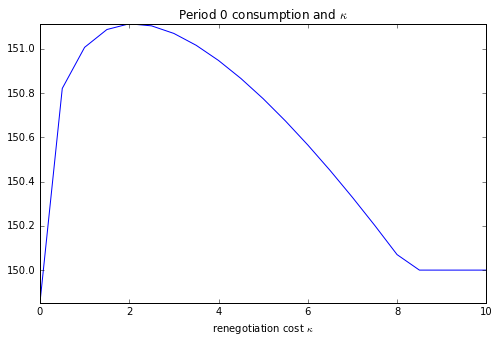

In [47]:
cC.rho = 1
for i in range(0,num_pts):               # look through kappa recalculating optimal contract each time
    cC.kappa = kaps[i] 
    cCRP[:,i] = cC.reneg_proof().x 
c0 = cCRP[0,:]

plt.plot(kaps, c0) 
plt.ylim((min(c0), max(c0)))
plt.xlabel('renegotiation cost $\kappa$')
plt.title(r'Period 0 consumption and $\kappa$')
plt.show()

### The choice to become a commercial non-profit

### Modeling the non-profit

The no-renegotiation constraint has two parts.  A pure for-profit captures fraction $\alpha = 1$ of profits and faces renegotiation cost 
not-for-profit of type $\alpha$ and faces renegotiation cost $h(\alpha) = h(1)$.  More generally a non-profit of type $\alpha$ has a no-renegotiation constraint of the form 
$$\alpha \left[ \Pi ^{R}-\Pi \right] \geq h(\alpha )$$

To be specific here let's model this as 
$$h(\alpha )=\kappa \left( 1-\alpha \right) $$

So that at $\alpha =1$ there is no cost to renegotiation and at $0< \alpha <1$ there is a non-negative non-pecuniary cost of up to $\kappa$.  The constraint can then be written as 
$$\left[ \Pi ^{R}-\Pi \right] \geq C(\alpha )=\frac{h(\alpha )}{\alpha }$$

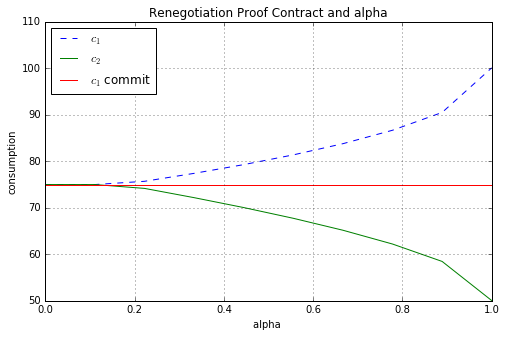

In [48]:
# Similar to above but solve for contract as a function of firm type ALPHA
y = np.array([100,100,100])          # To see how endowment affects contract
cC.y     = y                            
cCF      = cC.fcommit()
num_pts  = 10
alphs    = np.linspace(0.0,1.0,num_pts)   # iterate over different values of beta
HA       = 10*(np.ones(num_pts) - alphs)   #  h(alpha)/alpha  or cost of renegotiaton
cCRP     = np.zeros((3,num_pts))          # matrix for (c0,c1,c2) at each kappa
pvu0RP   = np.zeros(num_pts)  #PVU0 when contracting with alpha=1 firm

for i in range(0,num_pts):
    cC.kappa = HA[i]                 # change optimal contract
    cCRP[:,i] = cC.reneg_proof().x 
    cC.guess =  cCRP[:,i]                 # use this sol as guess for next optimum
    pvu0RP[i] = cC.PVU(cCRP[:,i],cC.beta)
    
#last entry is 'pure profit' pvu0RP[-1]
pvu0RP_pure = pvu0RP[-1]

c0,c1,c2 = cCRP[0,:], cCRP[1,:],cCRP[2,:]                # save results for plotting

fig3 = plt.figure()  
plt.plot(alphs,c1,'--',label='$c_{1}$')
plt.plot(alphs,c2,label='$c_{2}$')
plt.plot(alphs,np.ones(num_pts)*cCF[1],label='$c_{1}$ commit')
plt.grid()
plt.title('Renegotiation Proof Contract and alpha' )
plt.xlabel('alpha ')
plt.ylabel('consumption')
plt.legend(loc='upper left')
plt.show()

### 'Commercial' non-profits 
A 'pure' for profit (with $\alpha$=1.0) earns a reduced (possibly negative) profit due to it's inability to commit. Seen in the plot as profits the height of the horizontal line.

Any non-profit with $\alpha$ above about 0.4 and below 1.0 can better commit to not renegotiate a larger set of contracts and therefore can offer a more profitable renegotiation-proof contract. Even though they capture only fraction $\alpha$ of those profits, the take home profits exceed the profits of the pure for-profit. 

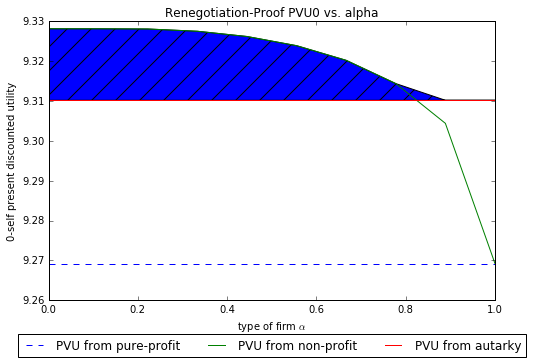

In [49]:
cC.y = [130,85,85]  
#last entry is 'pure profit' pvu0RP[-1]
pvu0RP_full = pvu0RP[-1]*np.ones(num_pts)
pvu0_aut  = cC.PVU(cC.y,cC.beta)*np.ones(num_pts)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Renegotiation-Proof PVU0 vs. alpha')
plt.xlabel(r'type of firm $ \alpha$')
plt.ylabel('0-self present discounted utility')
plt.plot(alphs,pvu0RP_full,'--',label='PVU from pure-profit')
plt.plot(alphs,pvu0RP,label='PVU from non-profit')
plt.plot(alphs,pvu0_aut,label='PVU from autarky')

ax.fill_between(alphs, np.fmax(pvu0RP,pvu0_aut), pvu0_aut,hatch='/')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=None, ncol=5)
plt.show()

The figure above compares what the customer can get (present discounted utility of period 0 self) from autarky compared to what he could get contracting in a situation with competition and exclusive contracts.

In the particular example ($\beta = 0.5, \rho=0.75, y=[130,85, 85]$) the autarky consumption bundle is rather close to what could be offered via consumption smothing so the total surplus to be divided is not that large.  The pure for profit firm offers a renegotiation proof contract that does such a poor smoothing job that the consumer prefers to stay in authaky.  However a commercial non-profit with alpha below ~ 0.8 offers a smoother contract and hence gains to trade.  

Now as presently modeld that non-profit will of course get zero profits (80% of zero!). We can model instead situations where at any period 1 renegotiation it's the consumer who gives up all surplus since the assumption of exclusive contracts means the period 1 self will be willing to give up quite a bit. Or maybe they Nash bargain.  THese cases might be more realistic. 

We'll get to these in a moment but first lets look at how the above situation depends on the initial y vector. 
 

In [50]:
cC.print_params()

beta    : 0.5
guess   : [ 149.85  100.1    50.05]
kappa   : 0.0
rho     : 1
y       : [130, 85, 85]


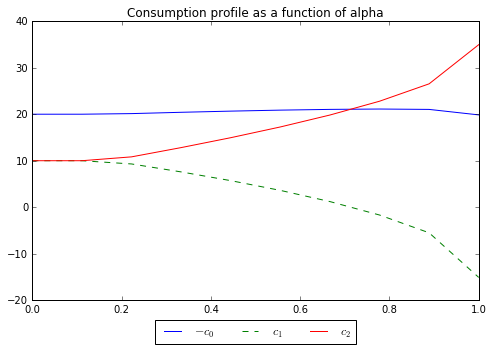

In [51]:
#plot(alphs,cMRP[0,:],label='$c_{0}$')
fig = plt.figure()
plt.plot(alphs,cCRP[0,:]-cC.y[0],label='$-c_{0}$')
plt.plot(alphs,cC.y[1]-cCRP[1,:],'--',label='$c_{1}$')
plt.plot(alphs,cC.y[2]-cCRP[2,:],label='$c_{2}$')

plt.title('Consumption profile as a function of alpha')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=None, ncol=5)
plt.show()

**Loan, repayment and PVU breakdown by periods as function of alpha**
(to be completed...results below are from monopoly case)

In [52]:
#print("alpha      c0     c1    c2        profit = (y0-cMRP0) + (y1-cMRP1) + (y2-cMRP2)")
#print("-"*79)
#for i,a in enumerate(alphs):
#    print("{:5.2f}:   {:6.2f} {:6.2f} {:5.2f},   {:8.2f} = {:8.2f}   + {:8.2f}   + {:8.2f}   "
#          .format(a, cMRP[0,i], cMRP[1,i], cMRP[2,i],profitRP[i],y[0]-cMRP[0,i],y[1]-cMRP[1,i],y[2]-cMRP[2,i],))
#print()

The inability to commit means the renegotiation proof contract doesn't smooth consumption very well for the consumer.  This ends up hurting the bank, since they must now 'compensate' the consumer for the higher variance of consumption if the participation constraint is still to be met.  

The code that follows produces a grid of subplots to illustrate how the results (the relation between $\alpha$ and retained profits) depends on the initial y vector, which in turn also determines whether this will be borrowing or saving.  

##The role of y
###Gains to consumer with diferent firms $\alpha$
Even though it earns zero profits a pure for-profit firm's renegotiation proof contract will offer less consumption smoothing that a firm that due to its non-profit status has higher renegotiation costs.  

NOTE:  some parts of this script need manual adjustment

In [53]:
cC.rho=0.95

Left: present discounted U (shaded = NP dominates). Right: net saving in each period as function of α :
[ 120.   90.   90.] 50.4370078219 50.5134973232 50.4553028372 50.4370078219
cCF :  [ 150.   75.   75.]
[ 140.   80.   80.] 50.4370078219 50.5134973232 50.5048334168 50.4370078219
cCF :  [ 150.   75.   75.]
[ 160.   70.   70.] 50.4370078219 50.5134973232 50.5106763623 50.4370078219
cCF :  [ 150.   75.   75.]


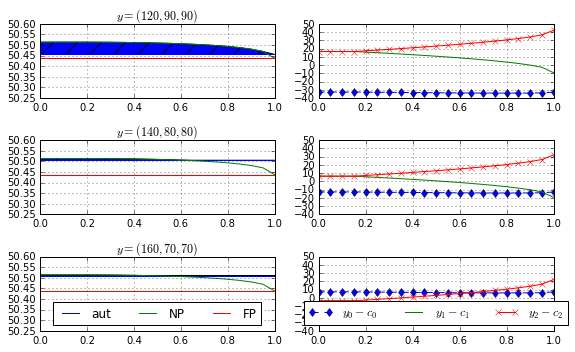

In [54]:
print("Left: present discounted U (shaded = NP dominates). Right: net saving in each period as function of α :")
num_pts  = 21
alphs    = np.linspace(0,1,num_pts)       # iterate over different alphas
HA        = 10*(np.ones(num_pts)-alphs)     # h(alpha)/alpha  or cost of renegotiaton
cCRP     = np.zeros((3,num_pts))             # to store (c0,c1,c2) for each alpha
pvu0RP   = np.zeros(num_pts)  #PVU0 when contracting with alpha=1 firm
pvu0_aut  = cC.PVU(cC.y,cC.beta)*np.ones(num_pts)

fig, ax = plt.subplots(10,sharex=True)
numy0 = 3     # rows of subplots
ax = plt.subplot(numy0,2,1)

# Vary y contracts (maintaining PV at 300 in zero interest rate setting)
for j in range(1, numy0 + 1):  
    y0 = 100 + j*20
    y = np.array([y0,100,100])            
    y = np.array([y0,(300-y0)/2,(300-y0)/2])   
    cC.y = y
    pvu0_aut  = cC.PVU(cC.y,cC.beta)*np.ones(num_pts)
    
    ax1 = plt.subplot(numy0, 2, j*2-1, sharex=ax)  
    for i in range(0, num_pts):
        cC.kappa = HA[i]             # change reneg cost  
        
        cCRP[:,i]    = cC.reneg_proof(monop_reg = False).x 
        cC.guess     = cCRP[:,i]         # store sol as guess for next search
        pvu0RP[i] = cC.PVU(cCRP[:,i],cC.beta)
   
    #last entry is 'pure profit' pvu0RP[-1]
    #pvu0RP_pure = pvu0RP[-1]
    
    pvu0RP_full = pvu0RP[-1]*np.ones(num_pts) 
    
    # I HAVE NOT YET AUTOMATED THE AXIS BOUNDS
    pumin =  min(pvu0RP[-1],min(pvu0_aut))
    pumax = max(pvu0RP)
    ax1.set_ylim([50.25, 50.6])
    print(y,pumin,pumax,min(pvu0_aut),pvu0RP[-1])
    print("cCF : ",cCF)
    
    pvu0RP_full = pvu0RP[-1]*np.ones(num_pts) 
    ax1.set_title(r'$y=( %2.0f, %2.0f, %2.0f)$' %(y0,y[1],y[2]))
    ax1.plot(alphs, pvu0_aut,label='aut')
    ax1.plot(alphs, pvu0RP,label='NP')
    ax1.plot(alphs, pvu0RP_full,label='FP')
    ax1.fill_between(alphs, np.fmax(pvu0RP,pvu0_aut), pvu0_aut,hatch='/')
    plt.grid()
        
    ax2 = plt.subplot(numy0,2,j*2, sharex=ax, sharey=ax)    # Plot contract terms in right column plot
    #ax1.set_ylim([0, 25])
    ax2.plot(alphs, y0 - cCRP[0,:],"d--",label='$y_0-c_0$')
    ax2.plot(alphs, y[1] - cCRP[1,:],label='$y_1-c_1$')
    ax2.plot(alphs, y[2] - cCRP[2,:],"x-",label='$y_2-c_2$')
    #ax2.axhline(y=0, color ='k')
    #ax2.plot(alphs, y[0]*np.ones(num_pts))
    #ax2.plot(alphs, y[1]*np.ones(num_pts))
    plt.grid()    
ax1.legend(loc='lower center', fancybox=None, ncol=5)
ax2.legend(loc='lower center', fancybox=None, ncol=5)
plt.tight_layout()

plt.savefig('figs\Comp_excl.pdf', format='pdf')
plt.show()    

In [55]:
plt.close('all')

**INTERPRETATION**: The left column of plots above shows renegotiation-proof profits as a function of $\alpha$ where $\alpha$ affects both the share of profits that are captured as well as the cost of renegotiation as described above.  The blue shaded area indicates where commercial non-profits (that choose an $\alpha <1$) capture more profit than a pure for-profit. 

The right column of plots shows the terms of the associated contract displayed as 'net savings' (y0-c0), (y1-c1), and (y2-c2).  When these are positive the client is saving or repaying, when negative they are borrowing.

When we keep the PV of y constant but change the ratio of period zero income y0 to later period income, y vectors that lead to borrowing (lower y0, higher y1,y2) deliver higher full-commitment (and renegotiation-proof) profits at any level of alpha. 

Since most of the profits are in the 0 to 1 period, they weigh more heavily in total profits.  Turning non-profit is only attractive at relatively high values of alpha (since at lower alpha they're forfeiting the period 0-1 profits). At higher y0 (tilted more toward savings) full commitment (and renegotiation-proof) profits are lower The pattern seems to be that as we move toward first period savings...

### NOT FINISHED
Profitability as a function of y0

### Own-savings strategies

In [56]:
cC = Contract.Competitive(beta = 0.9)
cC.rho = 0.5
cC.y = [110,95,95]
cC.print_params()

beta    : 0.9
guess   : [100 100 100]
kappa   : 0
rho     : 0.5
y       : [110, 95, 95]


In [57]:
def saving(c,y):
    return c-y

In [58]:
print(cC.y)
print(cC.ownsmooth())
print(cC.fcommit())

[110, 95, 95]
[ 114.7   102.38   82.92]
[ 114.5    92.75   92.75]


In [59]:
saving(cC.ownsmooth(),cC.y)

array([  4.7 ,   7.38, -12.08])

In [60]:
PDV =300
y0_step = 2
y0_start = 50
y0_end = PDV -50
Y0 = range(y0_start,y0_end,y0_step)
n = len(Y0)
profity0 = np.zeros(n)
profity0B = np.zeros(n)
i=0

for y0 in Y0:  
    ybar = (PDV-y0)/2
    cM.y =([y0,ybar,ybar])
    cMF = cM.fcommit()
    cMRP = cM.reneg_proof().x
    cM.guess = cMRP
    profity0[i] = cM.profit(cMRP,cM.y)
    profity0B[i] = cM.profit(cMF,cM.y)
    
    i += 1

NameError: name 'cM' is not defined

In [ ]:
plt.plot(profity0,Y0,'b-',label="reneg. proof")
plt.plot(profity0B,Y0,'r',label="full commit")
plt.xlim([-2,6])
plt.ylim([80,160])c

plt.title("Profits as a function of y0")
plt.xlabel("profits $\pi$")
plt.ylabel("y0")
plt.legend(loc='center right')
plt.grid()
plt.axvline()

## Modifications when consumer has a home savings option##
The above ana

In [ ]:
cM = Monopoly(0.8) 

In [ ]:
cM.kappa =0
cM.guess = cMF
cMRP = cM.reneg_proof()
cMRP.x

In [ ]:
plot(alphs,C)

In [ ]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(alphs, profitRP)
ax1.plot(alphs, NprofitRP)
ax1.plot(alphs,cM.profit(cMF,y)*ones(num_pts))
ax1.grid(True)
ax1.set_title('Sharing both axes')
ax2.plot(alphs, NprofitRP)
ax3.plot(alphs,cM.profit(cMF,y)*ones(num_pts))
show()

## Other Results

### $\beta$ and loan size

Let's plot the the relationship between period 0 loan size in a full-commitment contract and the extent of present-bias captured by $\beta$

In [ ]:
cM = Contract.Monopoly(0.8)               # create an instance m

num_pts = 21
betas = np.linspace(0.1,1,num_pts)           # iterate over different values of beta
CMF = np.zeros((3,num_pts))                  # a three row matrix to store (c0,c1,c2) for each beta

for i in range(0,num_pts):
    cM.beta = betas[i]                    # change beta before recalculating optimal contract
    CMF[:,i] = cM.fcommit()       

loan   = CMF[0,:] - cM.y[0]               # save results for plotting
repay1 = CMF[1,:] - cM.y[1]
repay2 = CMF[2,:] - cM.y[2]

plt.plot(betas,loan,'--')                          # plot    
plt.plot(betas,repay1)
plt.plot(betas,repay2)
plt.grid()
plt.title('Monopoly Commitment Contract as function of beta')
plt.xlabel('beta')
plt.ylabel('net repayment')
plt.legend(['loan','repay1','repay2'])

### Example full commitment contract (and renegotiation with a naive consumer)

Here is an example of the full-commitment contracts a monopolist offers and the contract a monopolist and a naive consumer would renegotiate to from that same full commitment contract (but note that a intermediary who knows they are dealing with a naive consumer would bait them with a different initial contract). 

In [ ]:
cM.beta = 0.8            # Reset to beta = 0.8 case and print out other parameters
cM.print_params()

In [ ]:
cMF = cM.fcommit()      
cMr = cM.reneg(cMF)       
y = cM.y
print('0-Discounted utility full commit: {0:4.3f}'.format(cM.PVU(cMF,cM.beta)))
print('and   Naive renegotiate: {1:4.3f}'.format(cM.PVU(cMr,cM.beta)))
#print('Profits from full commit: {0:4.3f}   and   Naive renegotiate:{1:4.3f}'.format(cM.profit(y,cMF), cM.profit(y,cMr)))

##### Scratch play area

#### 3D plots

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
c0, c1 = np.arange(0,150,1), np.arange(0,150,1)
c2 =  
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()


### Is $c_0$ (and hence net borrowing) higher or lower in renegotiation-proof contracts?
It's going to depend on $\rho$ 

In [ ]:
bb = np.arange(0,1,0.05)
bb

In [ ]:
for rh in np.arange(0.2,2,0.2):
    c0RP = 300/(1+bb+bb**(1/rh))
    c0F = 300/(1+2*bb**(1/rh) ) 
    rat = c0RP/c0F
    plt.plot(bb,rat)
    plt.annotate('{:3.1f}'.format(rh),xy=(0.5,rat[len(rat)/2]))
plt.title(r'Ratio $\frac{c_0^{RP}}{c_0^F}$')
plt.xlabel(r'$\beta $')
plt.show()

In [ ]:
for rh in np.arange(0.2,2,0.2):
    c0RP = 300/(1+bb+bb**(1/rh))
    c0F = 300/(1+2*bb**(1/rh) ) 
    rat = c0RP/c0F
    plt.plot(bb,c0F)
    plt.annotate('{:3.1f}'.format(rh),xy=(0.5,rat[len(c0RP)/2]))
plt.title(r'consumption $c_0^{RP}$')
plt.xlabel(r'$\beta$')
plt.show()